# Numerical differentiation

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
from numpy import *
import scipy.stats as stats

def f(x): return tanh(x+.5)
def df(x): return (cosh(x+.5))**-2
def forward_difference(f, h): return (f(h)-f(0))/h
def backward_difference(f, h): return (f(0)-f(-h))/h
def central_difference(f, h): return (f(h)-f(-h))/(2*h)
def our_difference(f, h): return (-2*f(-h) - 3*f(0) + 6*f(h) - f(2*h)) / (6*h)

Convergence rate (FDF) = 0.8315
Convergence rate (BDF) = 0.8636
Convergence rate (CDF) = 0.6639
Convergence rate ("Our") = 0.4751


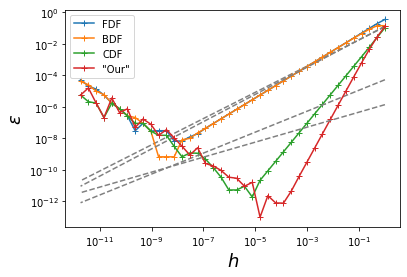

In [6]:
def convergence_study(formula, label):
    hs = array([2**-i for i in range(40)])
    err = array([abs(formula(f, h) - df(0)) for h in hs])
    plt.loglog(hs, err, '-+', label=label)
    fit = stats.linregress(log10(hs)[:-7], log10(err)[:-7])
    print("Convergence rate (%s) = %.4g" % (label, fit.slope))
    plt.loglog(hs, 10**(fit.intercept + fit.slope*log10(hs)), '--', color='0.5')
    plt.xlabel(r'$h$'); plt.ylabel(r'$\epsilon$')
    plt.legend()

convergence_study(forward_difference, 'FDF')
convergence_study(backward_difference, 'BDF')
convergence_study(central_difference, 'CDF')
convergence_study(our_difference, '"Our"')
